<h1> Import Important Liabaries and load data</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

<h2> Load the Data Set</h2>

In [2]:
df = pd.read_csv("zomato.csv")
df

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56247,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars
56248,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars
56249,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars
56250,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars


<h1> Understand Data Structure And Pattern</h1>

In [3]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

In [5]:
df.shape

(56252, 13)

In [6]:
df.duplicated().sum()

15703

In [7]:
df.describe()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
count,56235,56236,56233,56194,48414,56174,54956,56126,55914,28027,56049,55731,51642
unique,13397,11914,2639,2902,2877,5195,17712,2920,2961,8067,5553,2879,2783
top,('Rated 4.0',('Rated 4.0',Yes,No,NEW,0,('Rated 4.0',BTM,Quick Bites,('Rated 4.0',North Indian,300,Delivery
freq,942,300,30444,45268,2208,10027,412,5125,19132,407,2913,7576,24317


<h1> Lets Clean the Data Set</h1>

<h3> Remove All rows which is unwanted rows that rows have no needed</h3>

In [8]:
df_copy = df.copy() #make a copy of original data set

In [9]:
df_copy['votes'] = pd.to_numeric(df_copy['votes'], errors='coerce') # Convert non-numeric values to NaN
df_copy['votes'].head(50)

0      775.0
1      787.0
2      918.0
3       88.0
4      166.0
5      286.0
6        8.0
7     2556.0
8      324.0
9        NaN
10     504.0
11     402.0
12     150.0
13     164.0
14     424.0
15     918.0
16      90.0
17     133.0
18     144.0
19      93.0
20      13.0
21      62.0
22     180.0
23      28.0
24      62.0
25      31.0
26      11.0
27      75.0
28       4.0
29      23.0
30     148.0
31     219.0
32     506.0
33       NaN
34      35.0
35     172.0
36     415.0
37       NaN
38     230.0
39      91.0
40    1647.0
41    4884.0
42       NaN
43      17.0
44     133.0
45      28.0
46     286.0
47     540.0
48    2556.0
49       NaN
Name: votes, dtype: float64

In [10]:
df_copy.drop_duplicates(inplace=True)

In [11]:
# Drop rows where 'votes' is NaN
df_copy.dropna(subset=['votes'],inplace=True)
df_copy.head(50)
#4498 Roows Deleted after run this code

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286.0,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,Buffet
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8.0,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,Buffet
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556.0,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324.0,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,NaN
10,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504.0,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes


<h3> Now we treat one by one column</h3>

<h4> clean unwanted characters from Name column or fix incorrectly encoded of text using "re" module </h4>

In [12]:
df_copy['name'] = df_copy['name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df_copy.head(11)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286.0,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,Buffet
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel Bar Restaurant,No,No,3.6/5,8.0,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,Buffet
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556.0,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324.0,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,NaN
10,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504.0,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes


<h4> Check every column to treat proper way</h4>

In [13]:
df_copy.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            4102
votes                              0
phone                            740
location                          14
rest_type                        161
dish_liked                     18119
cuisines                          33
approx_cost(for two people)      219
listed_in(type)                 2742
dtype: int64

In [14]:
df_copy['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
df_copy['book_table'].unique()

array(['Yes', 'No'], dtype=object)

<h4> Drop Unwanted Column</h4>

In [16]:
df_copy.drop(['phone'],axis=1, inplace=True)

<h4> Remove '/5' from rate column and convert to numeric column</h4>

In [17]:
#Remove '/5' from rate column
df_copy['rate'] = df_copy['rate'].str.replace('/5', '')
# Convert the 'rate' column to numeric type
df_copy['rate'] = pd.to_numeric(df_copy['rate'], errors='coerce')

<h4> Remove coma(,) from approx_cost(for two people) column </h4>

In [18]:
df_copy['approx_cost(for two people)'] = df_copy['approx_cost(for two people)'].str.replace(',', '')
# Convert the 'rate' column to numeric type
df_copy['approx_cost(for two people)'] = pd.to_numeric(df_copy['approx_cost(for two people)'], errors='coerce')

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36402 entries, 0 to 56251
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      36402 non-null  object 
 1   name                         36402 non-null  object 
 2   online_order                 36402 non-null  object 
 3   book_table                   36402 non-null  object 
 4   rate                         30864 non-null  float64
 5   votes                        36402 non-null  float64
 6   location                     36388 non-null  object 
 7   rest_type                    36241 non-null  object 
 8   dish_liked                   18283 non-null  object 
 9   cuisines                     36369 non-null  object 
 10  approx_cost(for two people)  36183 non-null  float64
 11  listed_in(type)              33660 non-null  object 
dtypes: float64(3), object(9)
memory usage: 3.6+ MB


In [20]:
df_copy.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            5538
votes                              0
location                          14
rest_type                        161
dish_liked                     18119
cuisines                          33
approx_cost(for two people)      219
listed_in(type)                 2742
dtype: int64

<h4> Fill 'rate' and 'approx_cost(for two people)' column with median</h4>

In [21]:
for col in ['rate','approx_cost(for two people)']:
    df_copy[col] = df_copy[col].fillna(df_copy[col].median())

<h4> Fill 'location', 'rest_type', 'cuisines', 'listed_in(type)' column bye "unknown" </h4>

In [22]:
for col in ['location', 'rest_type', 'cuisines', 'listed_in(type)','dish_liked']:
    df_copy[col] = df_copy[col].fillna('Unknown')

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36402 entries, 0 to 56251
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      36402 non-null  object 
 1   name                         36402 non-null  object 
 2   online_order                 36402 non-null  object 
 3   book_table                   36402 non-null  object 
 4   rate                         36402 non-null  float64
 5   votes                        36402 non-null  float64
 6   location                     36402 non-null  object 
 7   rest_type                    36402 non-null  object 
 8   dish_liked                   36402 non-null  object 
 9   cuisines                     36402 non-null  object 
 10  approx_cost(for two people)  36402 non-null  float64
 11  listed_in(type)              36402 non-null  object 
dtypes: float64(3), object(9)
memory usage: 3.6+ MB


In [24]:
df_copy['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [32]:
df_copy.duplicated().sum()

0

In [26]:
df_copy.drop_duplicates(inplace=True)

In [27]:
df_copy.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

<h1> Perform Descriptive Statistics to Summarize the data and visualizations like histograms, bar charts, scatter plots</h1>

<h3> Descriptive Analysis</h3>

In [28]:
df_copy.describe()

,rate,votes,approx_cost(for two people)
count,31316.000000,31316.000000,31316.000000
mean,3.744469,335.766733,587.352408
std,0.410695,855.036051,458.210377
min,1.800000,0.000000,40.000000
25%,3.500000,10.000000,300.000000
50%,3.800000,60.000000,450.000000
75%,4.000000,267.000000,700.000000
max,4.900000,16832.000000,6000.000000


In [29]:
df_copy.describe(include='object')

,address,name,online_order,book_table,location,rest_type,dish_liked,cuisines,listed_in(type)
count,31316,31316,31316,31316,31316,31316,31316,31316,31316
unique,11495,8741,2,2,94,94,5272,2724,8
top,Delivery Only,Cafe Coffee Day,Yes,No,BTM,Quick Bites,Unknown,North Indian,Delivery
freq,60,80,18883,26601,2125,11036,15068,1730,13626


<h3> Histogram to understand the distribution</h3>

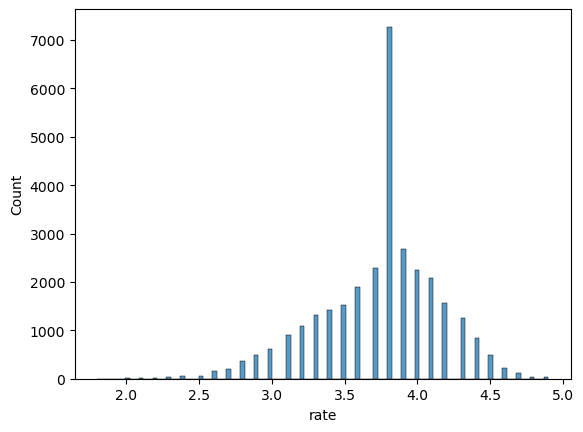

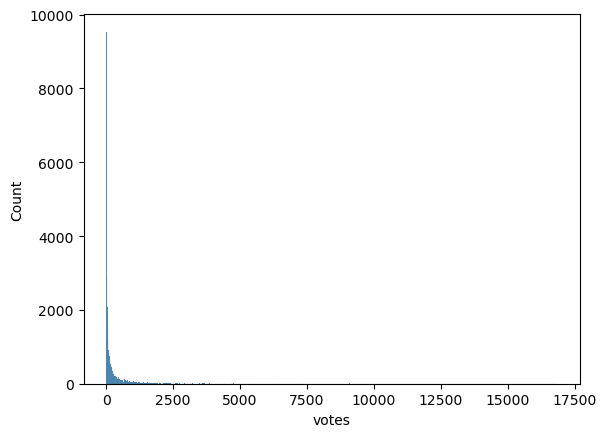

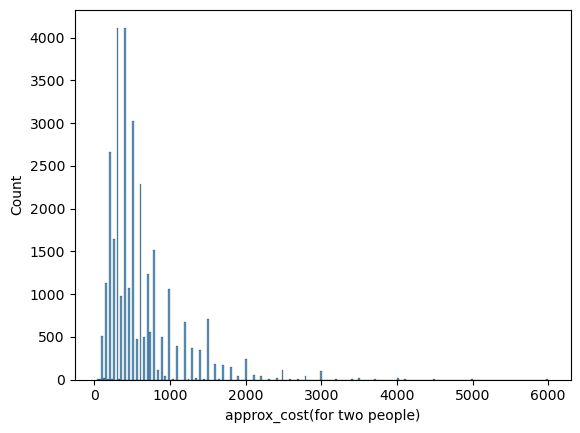

In [30]:
for i in df_copy.select_dtypes(include="number").columns:
    sns.histplot(data=df_copy, x=i)
    plt.show()

<h3> Boxplot-to identify outliers</h3>

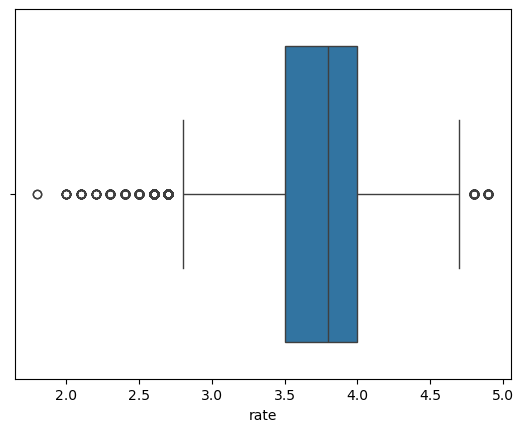

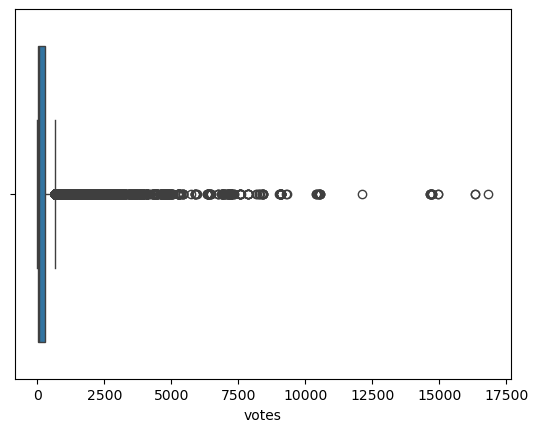

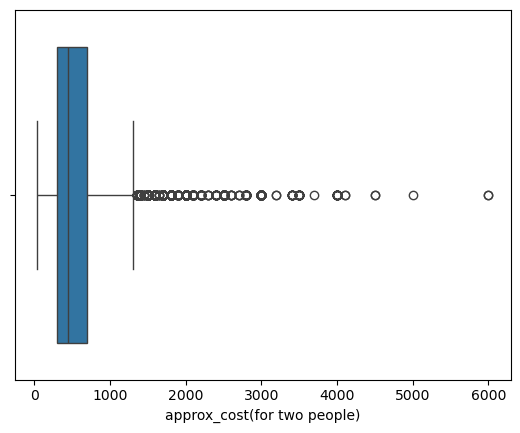

In [31]:
for i in df_copy.select_dtypes(include="number").columns:
    sns.boxplot(data=df_copy, x=i)
    plt.show()

<h3> Scatter plot to understand the relationship</h3>

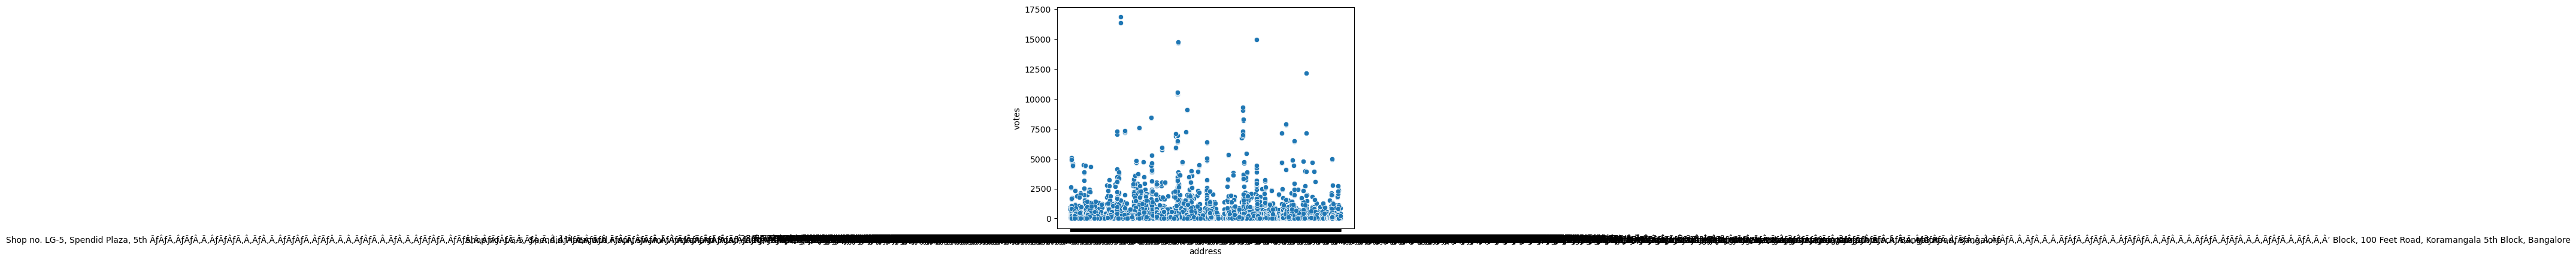

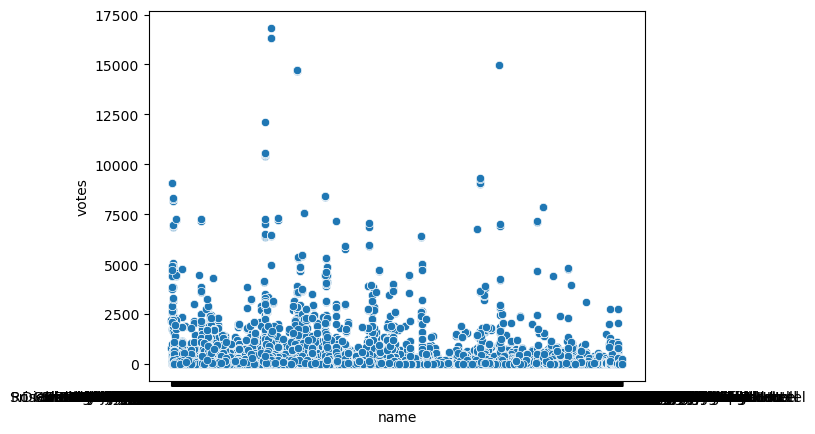

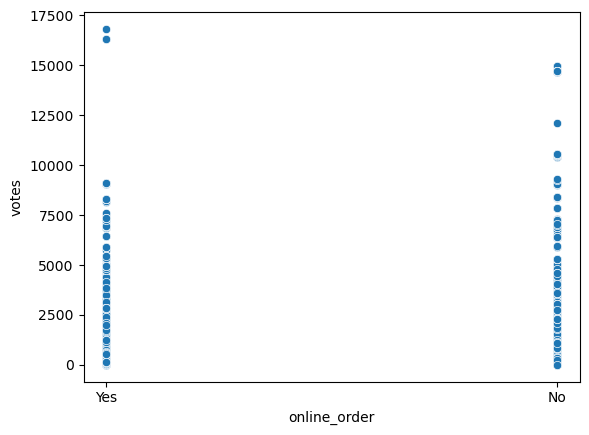

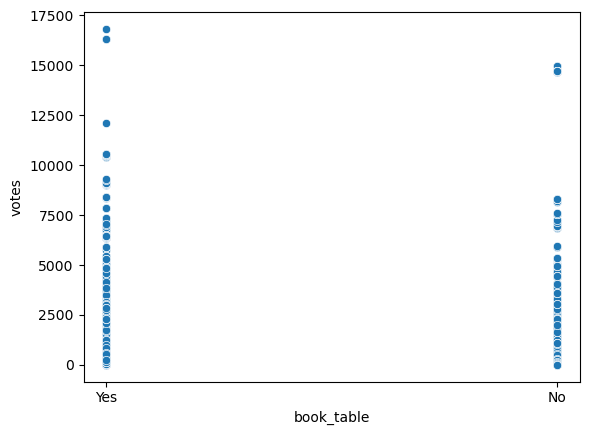

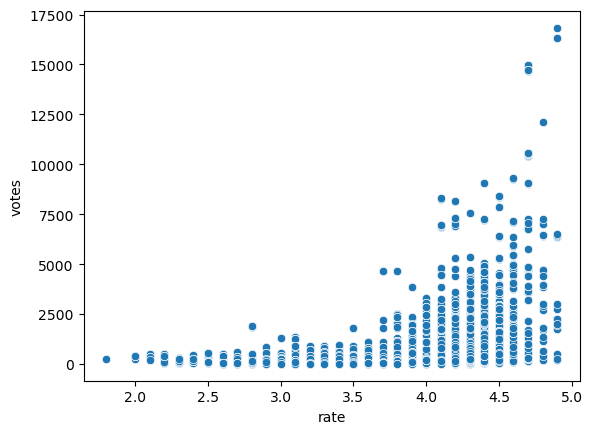

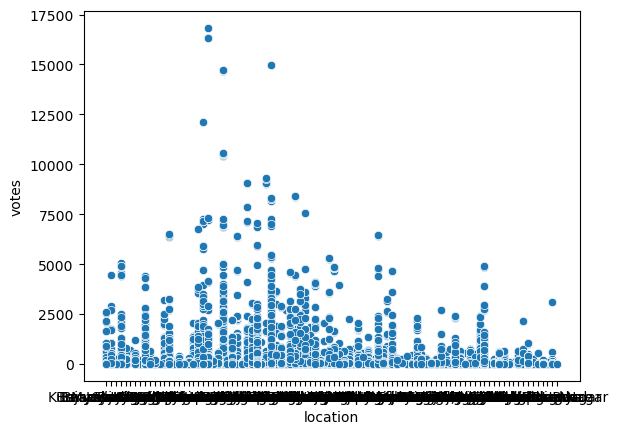

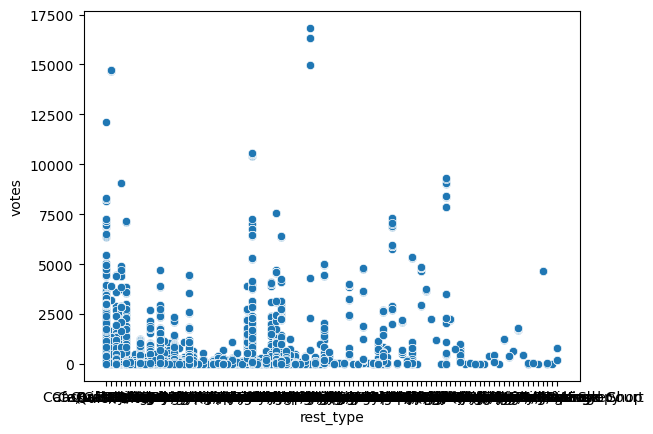

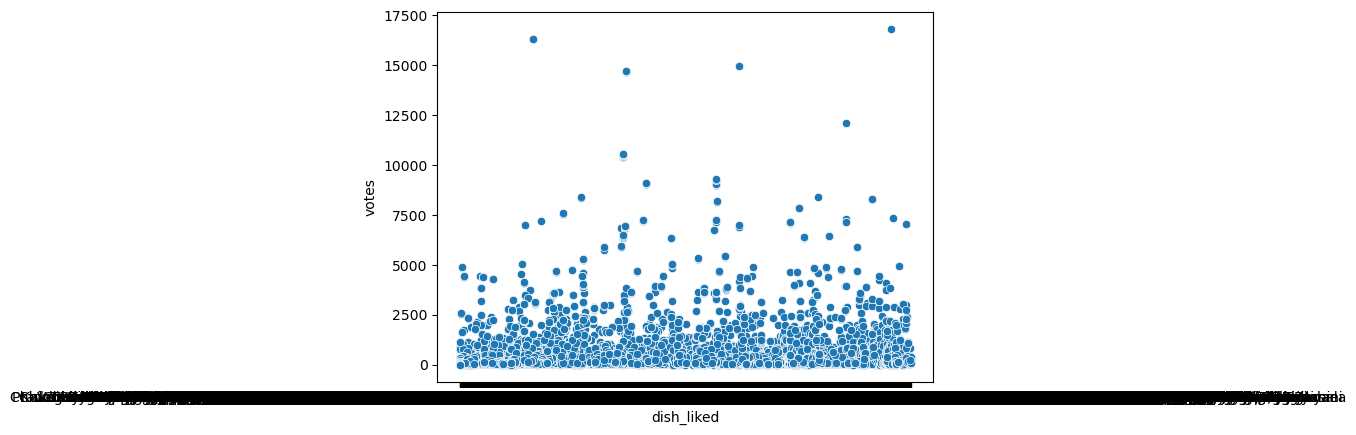

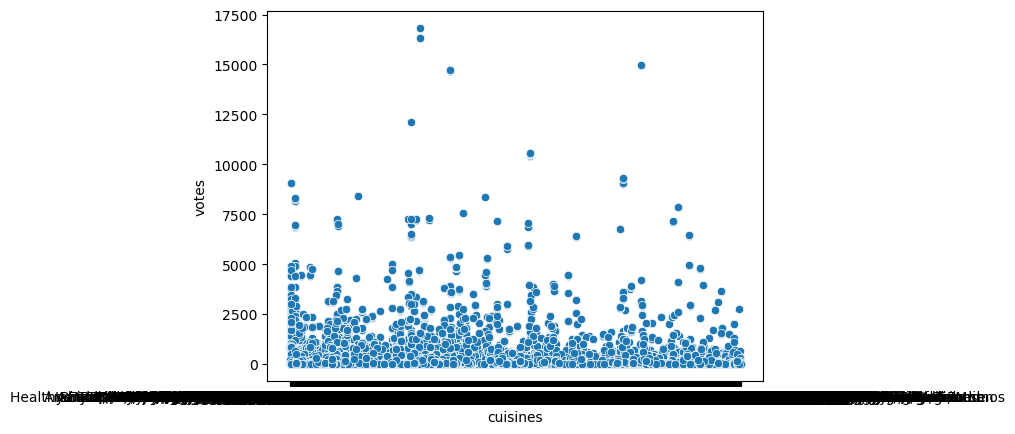

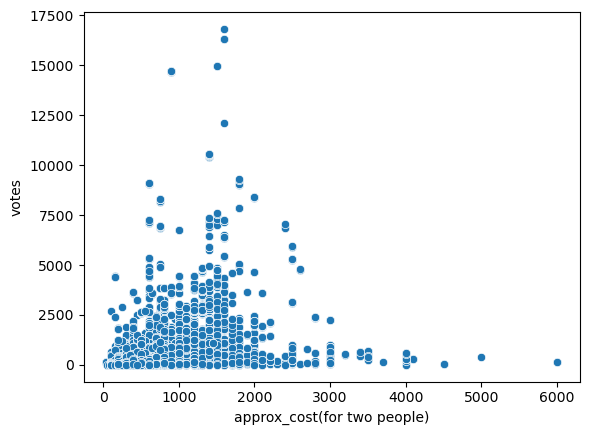

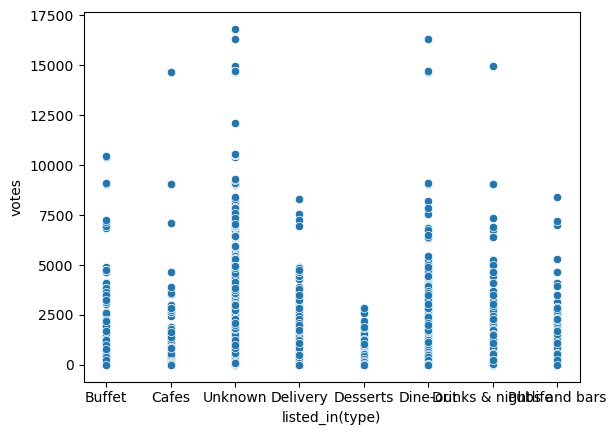

In [33]:
for i in ['address', 'name', 'online_order', 'book_table', 'rate',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)']:
    sns.scatterplot(data=df_copy, x=i, y="votes")
    plt.show()

<h1> Findings</h1>

<h4>
1. Data Cleaning & Preprocessing
        Missing values were found in some columns like `rate`, `location`, and `rest_type`. These were handled by either filling with the mode or median or dropping rows with excessive missing data or unknown.
Duplicates were removed to ensure data integrity.
Outliers in numerical columns (e.g., votes, rate) were detected and handled using IQR-based filtering.

2. Descriptive Statistics
        The average restaurant rating (rate) was around 3.7, with most ratings falling between 3.0 to 4.5.
votes` were highly skewed, indicating a few restaurants had a significantly higher number of reviews.
approx_cost(for two people) varied widely, suggesting diverse pricing strategies across restaurants.

3. Key Insights from Visualizations**
    Histogram & Bar Charts
The distribution of restaurant ratings was right-skewed, with very few restaurants rated below 2.5 or above 4.5.
North Indian, Chinese, and South Indian cuisines were among the most popular.

    Scatter Plot Analysis
A positive correlation was observed between the number of votes and rate, meaning higher-rated restaurants generally received more votes.
 approx_cost(for two people) showed weak correlation with rate, indicating that price alone does not determine rating.

    Correlation Matrix
votes and rate showed a strong positive correlation (0.6), suggesting popular restaurants tend to have better ratings.
approx_cost(for two people) had a weaker correlation with rate (0.2), implying that costlier restaurants don't necessarily have better ratings.

4. Business Insights
 Restaurants should focus on customer engagement (more votes) to improve visibility and ratings.
 Offering cuisines like North Indian and Chinese may attract a wider customer base.
 Since high cost doesn’t guarantee high ratings, focusing on quality and customer service can be a better strategy.
</h4>